### Navigation

#### Train an agent to navigate and collect yellow banans while avoiding blue bananas


In [4]:
!pip -q install ./python

In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import navigator as model

%matplotlib inline
plt.ion()

In [6]:
def describe_environment(env):
    '''
    Describe the navigator environment
    '''
    # get the brain
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    
    print('Default Brain: {}, {}'.format(brain_name, brain))
   
    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    
    # Agents in the environment
    print('Active Agents: {}'.format(len(env_info.agents)))
    
    # Action Space
    actions = brain.vector_action_space_size
    print('Action Space: {}'.format(actions))
    
    # State Space
    states = env_info.vector_observations[0]
    
    print('State Space: {}'.format(len(states)))

    print('States: {}'.format(states))
    
    
def show_navigation(env, agent, train = True, navigations = 1, max_steps = None):
    '''
    Show navigation of the agent in the environment
    param env: unity navigation environment
    param agent: dqn agent
    param navigations: number of navigations to play
    '''
    
    total_rewards = 0.
    
    for i in range(navigations):
        
        step       = 0
        rewards    = 0.
        brain_name = env.brain_names[0]
        env_info   = env.reset(train_mode = train)[brain_name]
        state      = env_info.vector_observations[0]
        
        while (max_steps == None) or (j < max_steps):
            
            # get agent's action for current state
            action = agent.select_action(state, epsilon = 0., training = train)
            
            # take the action that agent has selected
            env_info = env.step(action)[brain_name]
            
            # get transitioned state and reward
            state    = env_info.vector_observations[0]
            reward   = env_info.rewards[0]
            done     = env_info.local_done[0]
            
            rewards += reward
            step    += 1
            
            #print('Step: {}, Reward: {}'.format(step, reward))
            
            if done: 
                break
            
        total_rewards += rewards
    
    total_rewards /= navigations
    
    print('Avg Rewards: {:.2f}'.format(total_rewards))
    
    
def plot_rewards(rewards):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(rewards)), rewards)
    
    plt.ylabel('Reward')
    plt.xlabel('Episode')
    
    plt.show()

### Show environment details

In [7]:
env = model.get_environment()

describe_environment(env)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Default Brain: BananaBrain, Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Active Agents: 1
Action Space: 4
State Space: 37
States: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]


### Get the untrained agent and navigate the environment

In [8]:
# DQN Agent with no training
agent = model.get_agent(env)

In [9]:
# navigate the environment with untrained DQN agent
show_navigation(env, agent)

Avg Rewards: 0.00


### Train Agent

In [10]:
# train the DQN agent
rewards = model.train_navigator(env, agent)

 Episode-100, Avg Reward: 0.40 Reward: 0.40
 Episode-200, Avg Reward: 2.61 Reward: 2.61
 Episode-300, Avg Reward: 5.15 Reward: 5.15
 Episode-400, Avg Reward: 7.56 Reward: 7.56
 Episode-500, Avg Reward: 8.36 Reward: 8.36
 Episode-600, Avg Reward: 10.85Reward: 10.85
 Episode-700, Avg Reward: 12.68Reward: 12.68
 Episode-800, Avg Reward: 13.07Reward: 13.07
 Episode-900, Avg Reward: 13.16Reward: 13.16
 Episode-1000, Avg Reward: 13.13Reward: 13.13
 Episode-1087, Eps: 0.0382, Avg Reward: 14.04
 Agent has learned to solve the task. Episode-1087, Avg Reward: 14.04
 Episode-1093, Eps: 0.0375, Avg Reward: 14.08
 Agent has learned to solve the task. Episode-1093, Avg Reward: 14.08
 Episode-1094, Eps: 0.0374, Avg Reward: 14.10
 Agent has learned to solve the task. Episode-1094, Avg Reward: 14.10
 Episode-1095, Eps: 0.0373, Avg Reward: 14.17
 Agent has learned to solve the task. Episode-1095, Avg Reward: 14.17
 Episode-1097, Eps: 0.0370, Avg Reward: 14.19
 Agent has learned to solve the task. Episod

### Agent's Training Progress

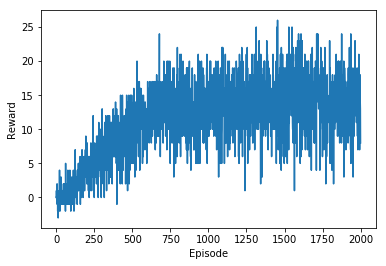

In [11]:
plot_rewards(rewards)

### Show navigation of a trained agent

In [12]:
model.restore_memory(agent)

show_navigation(env, agent, train = False)

Avg Rewards: 22.00


### Close Environment

In [ ]:
env.close()